# QCoCircuits

In [1]:
from qce_circuit import (
    IDeclarativeCircuit,
    DeclarativeCircuit,
    Rx90,
    Wait,
    Ry180,
    Ry90,
    DispersiveMeasure,
    FixedDurationStrategy,
    RelationLink,
    RelationType,
    plot_circuit,
)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

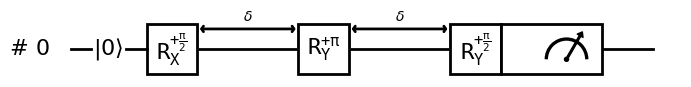

In [2]:
circuit: IDeclarativeCircuit = DeclarativeCircuit()
qubit_index: int = 0
echo_duration_strategy: FixedDurationStrategy = FixedDurationStrategy(2)

circuit.add(Rx90(qubit_index))
circuit.add(Wait(qubit_index, duration_strategy=echo_duration_strategy))
circuit.add(Ry180(qubit_index))
circuit.add(Wait(qubit_index, duration_strategy=echo_duration_strategy))
circuit.add(Ry90(qubit_index))
circuit.add(DispersiveMeasure(
    qubit_index,
    acquisition_strategy=circuit.get_acquisition_strategy(),
    relation=RelationLink(circuit.get_last_entry(), RelationType.FOLLOWED_BY)
))
plot_circuit(circuit)

In [3]:
from qce_circuit.addon_stim.factory_manager import (
    to_stim,
)

stim_circuit = to_stim(circuit)
print(stim_circuit.diagram())

q0: -SQRT_X-Y-SQRT_Y-M:rec[0]-


In [4]:
from qce_circuit.addon_openql.factory_manager import (
    to_openql,
)

openql_program = to_openql(circuit, circuit_id="ramsey")
openql_program.compile()  # Enforce compilation

(<Figure size 640x480 with 1 Axes>, <Axes: >)

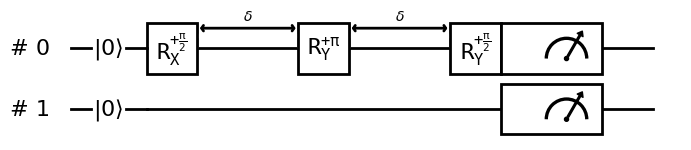

In [5]:
nested_circuit = DeclarativeCircuit()
second_qubit_index: int = 1

nested_circuit.add(circuit)
nested_circuit.add(DispersiveMeasure(
    second_qubit_index,
    acquisition_strategy=nested_circuit.get_acquisition_strategy(),
    relation=RelationLink(nested_circuit.get_last_entry(), RelationType.JOINED_END)
))
plot_circuit(nested_circuit)

In [6]:
nested_openql_program = to_openql(nested_circuit, circuit_id="nested_ramsey")
nested_openql_program.compile()  # Enforce compilation